<a href="https://colab.research.google.com/github/smu-linear-algebra2/mj/blob/main/%EB%B6%93%EA%BD%83_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
import os
os.listdir()

['.config', 'Iris.csv', 'sample_data']

In [4]:
import pandas as pd
import numpy as np

# 파일을 불러오기
iris_df = pd.read_csv("Iris.csv")

selected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris_df[selected_columns].values

species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
Y = iris_df['Species'].map(species_mapping).values

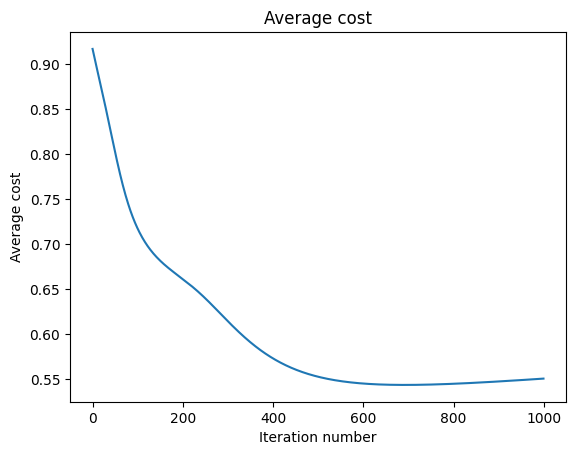

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

def feed_forward(x,W1,W2,b1,b2):
  a1=x
  z2=np.dot(W1,a1)+b1
  a2=sigmoid(z2)
  z3=np.dot(W2,a2)+b2
  a3=sigmoid(z3)
  return a1,a2,a3,z2,z3

# 모델 초기화
input_size = 4  # 특성 개수
hidden_size = 3
output_size = 3  # 붓꽃의 종이 3가지이므로 출력층 노드 개수는 3
learning_rate = 0.01

np.random.seed(0)
W1 = np.random.randn(hidden_size, input_size)*0.01
W2 = np.random.randn(output_size, hidden_size)*0.01
b1 = np.zeros((hidden_size, 1))
b2 = np.zeros((output_size, 1))

# 학습
num_iterations = 1000
list_average_cost = []
for i in range(num_iterations):
    # 순전파
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # 역전파
    dZ2 = A2 - Y.reshape(1, -1)
    dW2 = np.dot(dZ2, A1.T) / len(Y)
    db2 = np.sum(dZ2, axis=1, keepdims=True) / len(Y)
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X) / len(Y)
    db1 = np.sum(dZ1, axis=1, keepdims=True) / len(Y)

    # 가중치와 편향 업데이트
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2

    # 평균 손실 기록
    average_cost = np.mean(np.square(A2 - Y.reshape(1, -1)))
    list_average_cost.append(average_cost)

# 그래프 출력
plt.plot(list_average_cost)
plt.title('Average cost')
plt.ylabel('Average cost')
plt.xlabel('Iteration number')
plt.show()

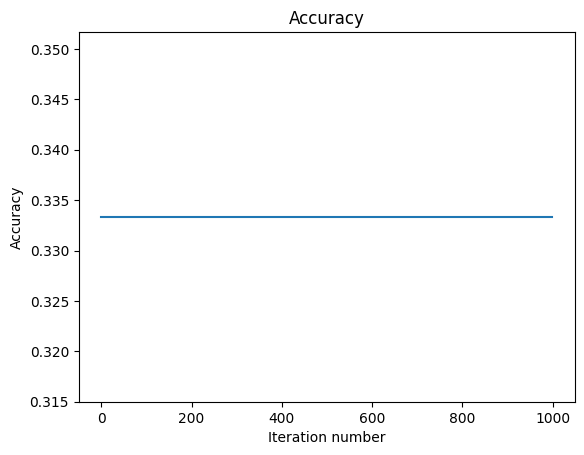

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 정확도 계산 함수 정의
def calculate_accuracy(predictions, targets):
    return np.mean(predictions == targets)

# 예측 함수 정의
def predict(W1, W2, b1, b2, X):
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    predictions = np.argmax(A2, axis=0)
    return predictions

# 정확도 계산 및 그래프 출력
list_accuracy = []
for i in range(num_iterations):
    # 예측 수행
    predictions = predict(W1, W2, b1, b2, X)

    # 정확도 계산
    accuracy = calculate_accuracy(predictions, Y)
    list_accuracy.append(accuracy)

# 그래프 출력
plt.plot(list_accuracy)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iteration number')
plt.show()
